In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
df = pd.read_csv('./titanic.txt')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [130]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Data Dictionary

|Variable|	Definition	|Key
|--------|--------|--------|
|survival|	Survival	|0 = No, 1 = Yes
|pclass|	Ticket class	|1 = 1st, 2 = 2nd, 3 = 3rd
|sex|	Sex	|
|Age|	Age in years (age can be fractional for children < 1)	|
|sibsp|	# of siblings / spouses aboard the Titanic	 |
|parch|	# of parents / children aboard the Titanic	|
|ticket|	Ticket number	|
|fare|	Passenger fare|
|cabin|	Cabin number	|
|embarked|	Port of Embarkation	|C = Cherbourg, Q = Queenstown, S = Southampton

## Performing EDA

In [131]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Youngest on the ship is 4.8 months old (or 0.42 years old)
- Oldest is 80 years old
- Average is around 30 years old

In [132]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [133]:
# df['SibSp'].value_counts()
# df['Parch'].value_counts()
# df.shape
df.groupby('Pclass').agg({"Survived": "mean"})

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<Axes: xlabel='Age'>

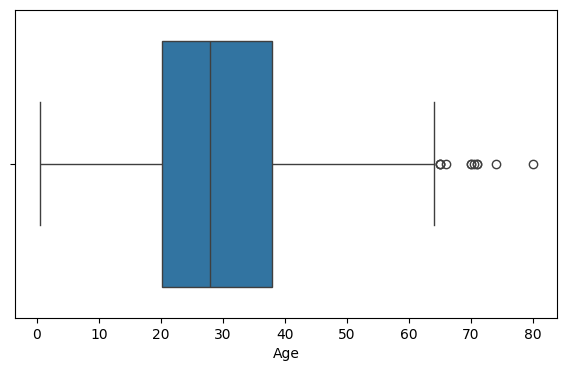

In [134]:
plt.figure(figsize=(7, 4))
sns.boxplot(x=df['Age'])

<Axes: ylabel='Survived'>

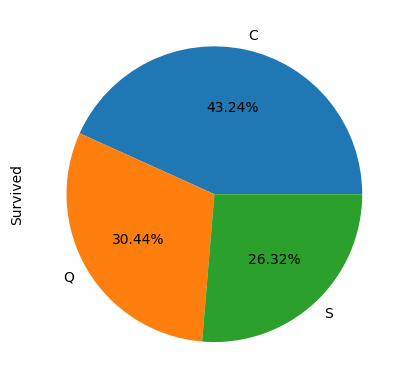

In [135]:
df.groupby('Embarked')['Survived'].mean().plot(kind="pie", autopct='%.2f%%')

<Axes: ylabel='Survived'>

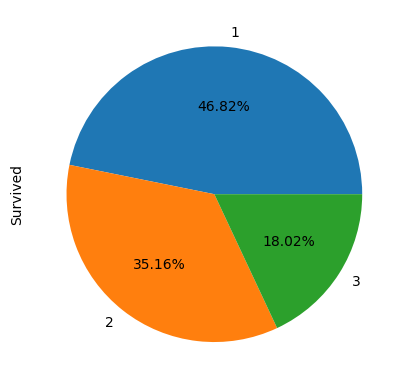

In [136]:
df.groupby('Pclass')['Survived'].mean().plot(kind="pie", autopct='%.2f%%')

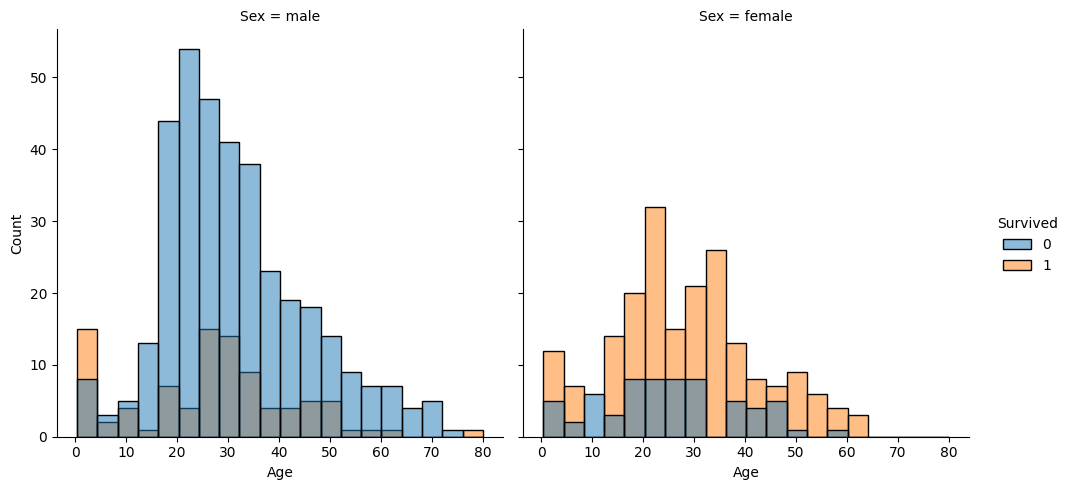

In [137]:
sns.displot(x=df['Age'], col=df['Sex'], hue=df['Survived'])

In [138]:
df.groupby('Sex').agg({"Survived": "mean"})

,Survived
Sex,
female,0.742038
male,0.188908


In [139]:
df.groupby('Sex')['Survived'].agg(['mean', 'count'])

,mean,count
Sex,,
female,0.742038,314
male,0.188908,577


In [140]:
total_males = len(df[df['Sex']=='male'])
mask = (df['Sex']=='male') & (df['Survived']==1)
survived_males = len(df[mask])

## Data Preprocessing

### Steps
- Encoding of categorical variables
- Feature Extraction
- Trim outliers
- Null treatment (Imputation)
- Feature selection (only grab columns we need)

In [141]:
cat_features = df.select_dtypes(include=['object'])
cat_features.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [142]:
# One Hot Encoding / get_dummies on Sex and Embarked bc they are not ordinal
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], dtype=int)
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


### Imputation

In [143]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [144]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [145]:
# mask = df['Name'].str.contains('Miss')
# df[mask]

In [146]:
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 65, 99], labels=[1,2,3,4])
df['AgeBin'].unique()

[3, 1, 2, 4]
Categories (4, int64): [1 < 2 < 3 < 4]

In [147]:
df['FamilySize'] = df['Parch'] + df['SibSp'] + 1

In [148]:
# Create a column that indicates if the passenger was traveling alone or not
df['IsAlone'] = np.where(df['FamilySize'] == 1, 1, 0)

Do passengers that travel alone have a higher chance of survival

<Axes: ylabel='IsAlone'>

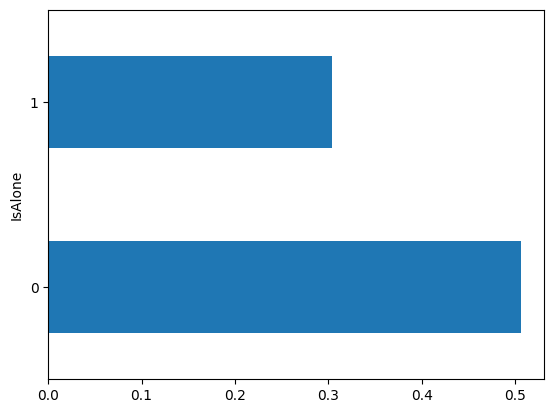

In [149]:
df.groupby(['IsAlone'])['Survived'].mean().plot(kind='barh')

It seems that the passengers that traveled alone had less chance of survival

In [150]:
# df[df['IsAlone'] == 1].groupby(['Sex_female', 'Sex_male']).plot()

## Splitting the Data for ML

### First Split: Features vs. Target (X vs y)

Supervised learning model (no target for unsupervised)

- X: features
- y: target (what we're trying to predict)

#### Feature Selection

In [151]:
# Features
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'AgeBin', 'FamilySize', 'IsAlone'],
      dtype='object')

In [152]:
X = df[
    [
        "Pclass",
        "Age",
        "Fare",
        "Sex_female",
        "Sex_male",
        "Embarked_C",
        "Embarked_Q",
        "Embarked_S",
        "AgeBin",
        "FamilySize",
        "IsAlone",
    ]
]

#### Define Target

In [153]:
y = df['Survived']

#### Normalization or Standardization

`MinMaxScaler()` vs `StandardScaler()`

| Feature | MinMaxScaler | StandardScaler |
| ---- | ----- | ---- |
| Range | Scales the data to a fixed range, typically beteween 0 and 1 | Scales the data to have a mean of 0 and a standard deviation of 1|
| Distribution | Not sensitive to the distribution of the data | Sensitive to the distribution of the data |
| Outliers | Sensitive to outliers | Not sensitive to outliers |
| Use cases | Good for datasets with a large range of values or neural networks| Good for datasets with a normal distribution or regression models |

In [154]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [155]:
MMS = MinMaxScaler()
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)

In [156]:
MMS_scaled = MMS.fit_transform(data)
MMS_scaled

array([[0.   ],
       [0.125],
       [0.25 ],
       [0.375],
       [0.5  ],
       [0.625],
       [0.75 ],
       [0.875],
       [1.   ]])

In [157]:
# Let's perform the MinMaxScaler (normalization) on our Titanic features

X_scaled = MMS.fit_transform(X)
X_scaled

array([[1.        , 0.27117366, 0.01415106, ..., 0.66666667, 0.1       ,
        0.        ],
       [0.        , 0.4722292 , 0.13913574, ..., 0.66666667, 0.1       ,
        0.        ],
       [1.        , 0.32143755, 0.01546857, ..., 0.66666667, 0.        ,
        1.        ],
       ...,
       [1.        , 0.34656949, 0.04577135, ..., 0.66666667, 0.3       ,
        0.        ],
       [0.        , 0.32143755, 0.0585561 , ..., 0.66666667, 0.        ,
        1.        ],
       [1.        , 0.39683338, 0.01512699, ..., 0.66666667, 0.        ,
        1.        ]])

### Second Split: Train vs. Test

Split our data into training data for ML training and testing data for ML evaluation

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
# test_size: most common train:test ratios: 75:25 and 80:20
# random_state: choose an algorithm for randomness => reproducable randomness
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=5) # 0.25 default

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(668, 11) (223, 11) (668,) (223,)


Now our data is ready for our ML 

## Building a Model

Classification model so have to pick classification algorithm

### Logistic Regression

In [163]:
from sklearn.linear_model import LogisticRegression

In [164]:
# Define the model
LR = LogisticRegression()

# Train the model - fit to training data
# based on X features, learn how to predict y target
LR.fit(X_train, y_train)

LogisticRegression()

#### Evaluation

In [165]:
# For evaluation, make predictions using the trained model on the testing data

# y_hat
X_test_pred = LR.predict(X_test)
X_test_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1])

In [166]:
X_test_pred.shape

(223,)

In [169]:
# Evaluate the model based on predicted testing data
score = LR.score(X_test, y_test)
print('Accuracy:', score)

Accuracy: 0.8295964125560538


Accuracy score common assumptions:
- 90%+ very good (high accuracy)
- 80%+ good
- 70%+ acceptable
- 60-70% poor (low accuracy)

Additional algos to consider
- Naive Bayes Classifier
- SVM Support Vector Matrix
- Decision Trees
- Random Forest Classifier
- Gradient Boosting